In [1]:
#Import Libraries
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
#Create a connection and engine object
#Parameter not inserted due to password being shown:
engine = create_engine()
connection = engine.connect()

In [3]:
#Create a pandas dataframe from a sql table
salary_data = pd.read_sql("SELECT salary FROM salary", connection)

Text(0, 0.5, 'Employees')

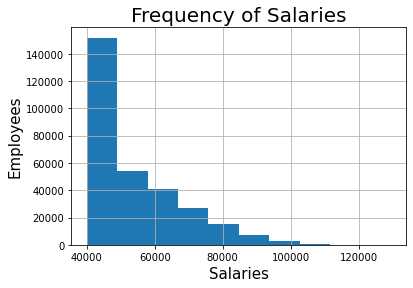

In [4]:
#Create Histogram in pandas to show salary ranges
salary_hist = salary_data.hist()

#Format Histogram
plt.title("Frequency of Salaries", fontsize = 20)
plt.xlabel("Salaries", fontsize = 15)
plt.ylabel("Employees", fontsize = 15)

In [5]:
#Create a pandas dataframe from a sql table
averageSalary_df = pd.read_sql("SELECT ROUND(AVG(s.salary),2), t.title FROM salary s JOIN employees e ON (s.emp_ID = e.emp_ID) JOIN titles t ON (e.emp_title = t.title_ID) GROUP BY t.title", connection)

#Set Title to index
averageSalary_df = averageSalary_df.set_index("title")

averageSalary_df

,round
title,
Assistant Engineer,48564.43
Engineer,48535.34
Manager,51531.04
Senior Engineer,48506.80
Senior Staff,58550.17
Staff,58465.38
Technique Leader,48582.90


Text(0, 0.5, 'Average Salary')

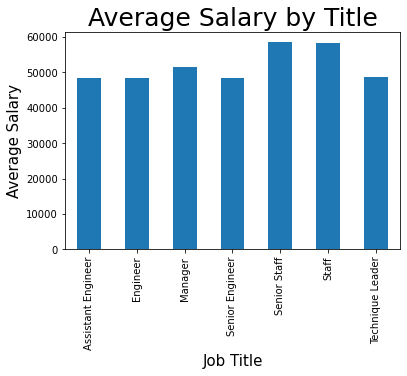

In [6]:
#Create a bar chart of average salary by title
avgSalary_bar = averageSalary_df.plot.bar(legend = None)

#Format the bar chart
plt.title("Average Salary by Title", fontsize = 25)
plt.xlabel("Job Title", fontsize = 15)
plt.ylabel("Average Salary", fontsize = 15)